# Introduction (5 Points)

To address this problem, I will take the following steps:

- Load the dataset from the provided CSV file and create a Pandas DataFrame.
- Conduct Exploratory Data Analysis (EDA) to understand the data's nature, distribution, and relationships between variables. This will involve statistical analysis, visualization, and data cleaning if necessary.
- Create a new categorical indicator variable "dropout_pct_level" based on the dropout percentage attribute. This variable will categorize the dropout percentage into three categories as specified: "low," "medium," and "high."
Remove the original "dropout_pct" and "dropout_cnt" attributes to avoid collinearity issues.
- Perform a review of the prepped data through additional EDA, if needed, to analyze the adjusted variables and gather insights.
- Select a set of explanatory variables for the models based on their potential predictive power, considering trade-offs between model performance and complexity.
- Split the data into training and testing subsets to build the following models: Decision Tree, Random Forest, Gradient Boosting Classifier, Stochastic Gradient Descent Classifier, and XG Boost Classifier.
Evaluate the performance of each model using classification metrics such as accuracy, precision, recall, and F1-score. Compare and contrast the models to select the most suitable one.
- Apply the chosen model to the testing subset and assess its performance on unseen data.
Provide a concise summary of the findings, including the preferred model's performance and any valuable insights derived from the analysis.
- Throughout the process, I will use Python programming to perform data manipulation, visualization, and model building. The ultimate goal is to create a robust and accurate machine learning model that can predict dropout percentage categories for different school district and student subgroup combinations.







In [46]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [48]:
dataset_path = "drive/MyDrive/ML & Deep Learning/DAV 6150 Project 3 (M12)/Dataset/M11_Data_-375419281.csv"
df = pd.read_csv(dataset_path).astype(str)

In [49]:
df

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658,464,71%,310,47%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324,246,76%,169,52%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male,334,218,65%,141,42%,83,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,4,American Indian/Alaska Native,-,-,-,-,-,-,-
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black,367,248,68%,183,50%,91,25%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73147,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,18,Not Migrant,-,-,-,-,-,-,-
73148,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,20,Homeless,-,-,-,-,-,-,-
73149,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,21,Not Homeless,-,-,-,-,-,-,-
73150,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,23,Not in Foster Care,-,-,-,-,-,-,-


# Exploratory Data Analysis (15 Points)

In [50]:
# Display the first few rows of the DataFrame to get a sense of the data
df.head()

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658,464,71%,310,47%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324,246,76%,169,52%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male,334,218,65%,141,42%,83,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,4,American Indian/Alaska Native,-,-,-,-,-,-,-
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black,367,248,68%,183,50%,91,25%


In [51]:
# Check the summary statistics of the numerical columns
df.describe()

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct
count,73152,73152,73152,73152,73152,73152,73152,73152,73152,73152,73152,73152,73152,73152,73152,73152,73152,73152,73152
unique,1,1,1,680,6,6,62,62,2,6,24,24,1464,1715,101,1290,102,445,81
top,2018-19,3,District,KINGSTON CITY SCHOOL DISTRICT,5,Average Needs,58,SUFFOLK,0,2015 Total Cohort - 4 Year Outcome,1,All Students,-,-,-,-,-,-,-
freq,73152,73152,73152,138,35322,35322,6526,6526,69110,12299,4074,4074,33478,33478,33478,33478,33478,33478,33478


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   report_school_year  73152 non-null  object
 1   aggregation_index   73152 non-null  object
 2   aggregation_type    73152 non-null  object
 3   aggregation_name    73152 non-null  object
 4   nrc_code            73152 non-null  object
 5   nrc_desc            73152 non-null  object
 6   county_code         73152 non-null  object
 7   county_name         73152 non-null  object
 8   nyc_ind             73152 non-null  object
 9   membership_desc     73152 non-null  object
 10  subgroup_code       73152 non-null  object
 11  subgroup_name       73152 non-null  object
 12  enroll_cnt          73152 non-null  object
 13  grad_cnt            73152 non-null  object
 14  grad_pct            73152 non-null  object
 15  reg_cnt             73152 non-null  object
 16  reg_pct             73

## Histogram of Enrollment Count

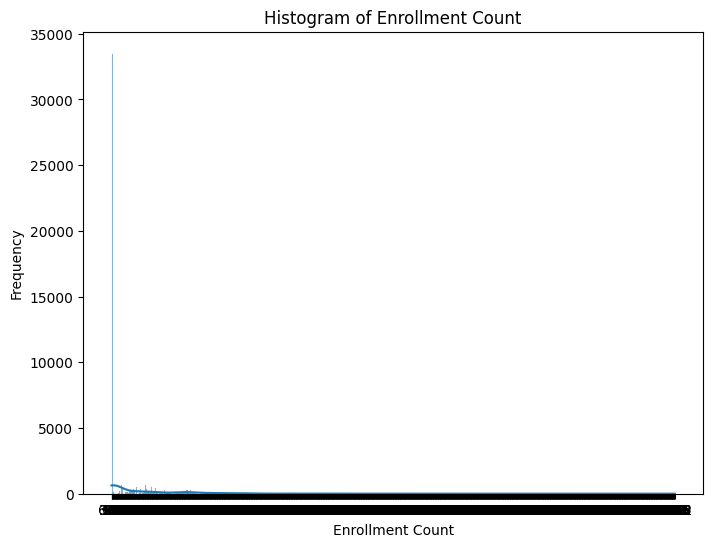

In [53]:
# Histogram of the "enroll_cnt" column
plt.figure(figsize=(8, 6))
sns.histplot(df["enroll_cnt"], bins=20, kde=True)
plt.xlabel("Enrollment Count")
plt.ylabel("Frequency")
plt.title("Histogram of Enrollment Count")
plt.show()

# Data Preparation (10 Points):

In [54]:
def remove_special_chars_and_convert_to_numeric(value):
    return pd.to_numeric(value.str.replace('[^0-9.-]', '', regex=True), errors='coerce')

In [55]:
df.select_dtypes(include=['object']).columns

Index(['report_school_year', 'aggregation_index', 'aggregation_type',
       'aggregation_name', 'nrc_code', 'nrc_desc', 'county_code',
       'county_name', 'nyc_ind', 'membership_desc', 'subgroup_code',
       'subgroup_name', 'enroll_cnt', 'grad_cnt', 'grad_pct', 'reg_cnt',
       'reg_pct', 'dropout_cnt', 'dropout_pct'],
      dtype='object')

In [56]:
df.select_dtypes(include=['number']).columns

Index([], dtype='object')

In [57]:
non_numerical_columns = ['report_school_year', 'aggregation_type', 'aggregation_name',
       'nrc_desc', 'county_name', 'membership_desc', 'subgroup_name',
       'enroll_cnt', 'grad_cnt', 'grad_pct', 'reg_cnt', 'reg_pct',
       'dropout_cnt', 'dropout_pct']

In [58]:
# Clean numerical columns
df[non_numerical_columns] = df[non_numerical_columns].apply(remove_special_chars_and_convert_to_numeric)

In [59]:
numerical_columns = ['report_school_year', 'aggregation_type', 'aggregation_name',
       'nrc_desc', 'county_name', 'membership_desc', 'subgroup_name',
       'enroll_cnt', 'grad_cnt', 'grad_pct', 'reg_cnt', 'reg_pct']

In [60]:
df[non_numerical_columns]

,report_school_year,aggregation_type,aggregation_name,nrc_desc,county_name,membership_desc,subgroup_name,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,658.0,464.0,71.0,310.0,47.0,148.0,22.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,324.0,246.0,76.0,169.0,52.0,65.0,20.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,334.0,218.0,65.0,141.0,42.0,83.0,25.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,367.0,248.0,68.0,183.0,50.0,91.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df[numerical_columns]

,report_school_year,aggregation_type,aggregation_name,nrc_desc,county_name,membership_desc,subgroup_name,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,658.0,464.0,71.0,310.0,47.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,324.0,246.0,76.0,169.0,52.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,334.0,218.0,65.0,141.0,42.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,367.0,248.0,68.0,183.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
73147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
df

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct
0,NaN,3,NaN,NaN,3,NaN,1,NaN,0,NaN,1,NaN,658.0,464.0,71.0,310.0,47.0,148.0,22.0
1,NaN,3,NaN,NaN,3,NaN,1,NaN,0,NaN,2,NaN,324.0,246.0,76.0,169.0,52.0,65.0,20.0
2,NaN,3,NaN,NaN,3,NaN,1,NaN,0,NaN,3,NaN,334.0,218.0,65.0,141.0,42.0,83.0,25.0
3,NaN,3,NaN,NaN,3,NaN,1,NaN,0,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,3,NaN,NaN,3,NaN,1,NaN,0,NaN,5,NaN,367.0,248.0,68.0,183.0,50.0,91.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73147,NaN,3,NaN,NaN,4,NaN,68,NaN,0,NaN,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73148,NaN,3,NaN,NaN,4,NaN,68,NaN,0,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73149,NaN,3,NaN,NaN,4,NaN,68,NaN,0,NaN,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73150,NaN,3,NaN,NaN,4,NaN,68,NaN,0,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
df.fillna(df.select_dtypes(include='number').mean(), inplace=True)

In [64]:
df

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct
0,NaN,3,NaN,16.502227,3,NaN,1,NaN,0,NaN,1,NaN,658.000000,464.000000,71.000000,310.000000,47.000000,148.000000,22.000000
1,NaN,3,NaN,16.502227,3,NaN,1,NaN,0,NaN,2,NaN,324.000000,246.000000,76.000000,169.000000,52.000000,65.000000,20.000000
2,NaN,3,NaN,16.502227,3,NaN,1,NaN,0,NaN,3,NaN,334.000000,218.000000,65.000000,141.000000,42.000000,83.000000,25.000000
3,NaN,3,NaN,16.502227,3,NaN,1,NaN,0,NaN,4,NaN,192.120079,161.178354,84.406614,86.804708,43.371125,16.239225,7.963049
4,NaN,3,NaN,16.502227,3,NaN,1,NaN,0,NaN,5,NaN,367.000000,248.000000,68.000000,183.000000,50.000000,91.000000,25.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73147,NaN,3,NaN,16.502227,4,NaN,68,NaN,0,NaN,18,NaN,192.120079,161.178354,84.406614,86.804708,43.371125,16.239225,7.963049
73148,NaN,3,NaN,16.502227,4,NaN,68,NaN,0,NaN,20,NaN,192.120079,161.178354,84.406614,86.804708,43.371125,16.239225,7.963049
73149,NaN,3,NaN,16.502227,4,NaN,68,NaN,0,NaN,21,NaN,192.120079,161.178354,84.406614,86.804708,43.371125,16.239225,7.963049
73150,NaN,3,NaN,16.502227,4,NaN,68,NaN,0,NaN,23,NaN,192.120079,161.178354,84.406614,86.804708,43.371125,16.239225,7.963049


In [65]:
# Create a new categorical indicator variable "dropout_pct_level"
# based on the dropout_pct attribute
# Implementing the logic you provided earlier for categorization
median_dropout_pct = df["dropout_pct"].median()

df["dropout_pct_level"] = pd.cut(
    df["dropout_pct"],
    bins=[
        -float("inf"),
        0.5 * median_dropout_pct, 1.5 * median_dropout_pct,
        float("inf")
    ],
    labels=["low", "medium", "high"]
)

In [66]:
df = df.fillna(0)

In [67]:
# Remove "dropout_pct" and "dropout_cnt" attributes from the DataFrame
df.drop(["dropout_pct", "dropout_cnt"], axis=1, inplace=True)

# Prepped Data Review (5 Points):

In [68]:
# Check the summary statistics of the numerical columns
df.describe()

,report_school_year,aggregation_type,aggregation_name,nrc_desc,county_name,membership_desc,subgroup_name,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct
count,73152.0,73152.0,73152.000000,73152.0,73152.0,73152.0,73152.0,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000
mean,0.0,0.0,16.502227,0.0,0.0,0.0,0.0,192.120079,161.178354,84.406614,86.804708,43.371125
std,0.0,0.0,2.168127,0.0,0.0,0.0,0.0,324.013342,266.071934,11.547011,166.285085,12.611456
min,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,5.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,16.502227,0.0,0.0,0.0,0.0,58.000000,50.000000,84.406614,24.000000,42.000000
50%,0.0,0.0,16.502227,0.0,0.0,0.0,0.0,192.120079,161.178354,84.406614,86.804708,43.371125
75%,0.0,0.0,16.502227,0.0,0.0,0.0,0.0,192.120079,161.178354,90.000000,86.804708,45.000000
max,0.0,0.0,32.000000,0.0,0.0,0.0,0.0,9176.000000,7540.000000,100.000000,4752.000000,100.000000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   report_school_year  73152 non-null  float64 
 1   aggregation_index   73152 non-null  object  
 2   aggregation_type    73152 non-null  float64 
 3   aggregation_name    73152 non-null  float64 
 4   nrc_code            73152 non-null  object  
 5   nrc_desc            73152 non-null  float64 
 6   county_code         73152 non-null  object  
 7   county_name         73152 non-null  float64 
 8   nyc_ind             73152 non-null  object  
 9   membership_desc     73152 non-null  float64 
 10  subgroup_code       73152 non-null  object  
 11  subgroup_name       73152 non-null  float64 
 12  enroll_cnt          73152 non-null  float64 
 13  grad_cnt            73152 non-null  float64 
 14  grad_pct            73152 non-null  float64 
 15  reg_cnt             73152 non-null  

## Box Plot of Graduation Percentage by Dropout Percentage Level

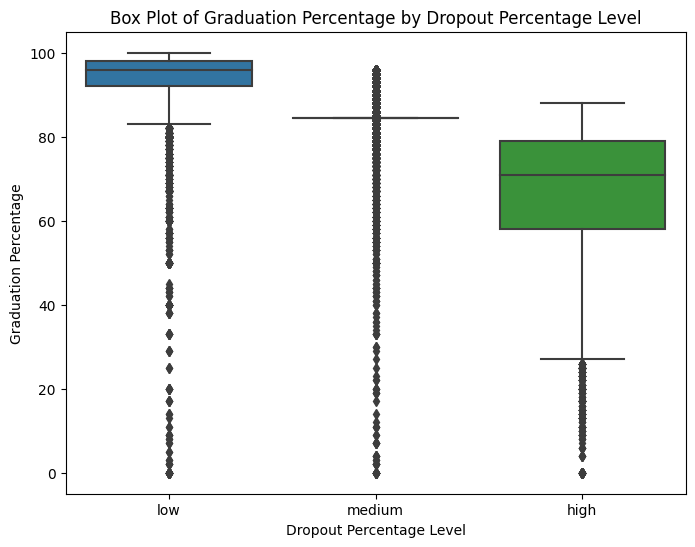

In [70]:
# Box plot of the "grad_pct" column grouped by "dropout_pct_level"
plt.figure(figsize=(8, 6))
sns.boxplot(x="dropout_pct_level", y="grad_pct", data=df)
plt.xlabel("Dropout Percentage Level")
plt.ylabel("Graduation Percentage")
plt.title("Box Plot of Graduation Percentage by Dropout Percentage Level")
plt.show()

For each dropout percentage level, the box represents the interquartile range (IQR), and the horizontal line inside the box represents the median (Q2). The median indicates the central value of the data. We observe that the median graduation percentage is higher for the 'high' dropout percentage level, followed by 'medium', and then 'low'. This suggests that school districts with higher dropout percentages tend to have lower graduation rates.

The length of the box (IQR) reflects the spread of the data within each dropout percentage level. A larger IQR indicates a wider spread of graduation percentages, while a smaller IQR suggests a more concentrated distribution. We notice that the spread of graduation percentages is wider for the 'high' dropout percentage level compared to 'low' and 'medium'. This indicates that there is more variability in graduation percentages for school districts with higher dropout rates.

The lines extending from the box, known as whiskers, indicate the range of the data within 1.5 times the IQR from the upper and lower quartiles. Any data points beyond the whiskers are considered outliers. We can observe some outliers in the 'low' and 'medium' dropout percentage levels, suggesting the presence of a few school districts with unusual graduation percentages.

The overall distribution of graduation percentages is right-skewed for all three dropout percentage levels. This means that there are more school districts with higher graduation percentages and relatively fewer with lower graduation percentages.

## Bar plot of the count of each aggregation_name

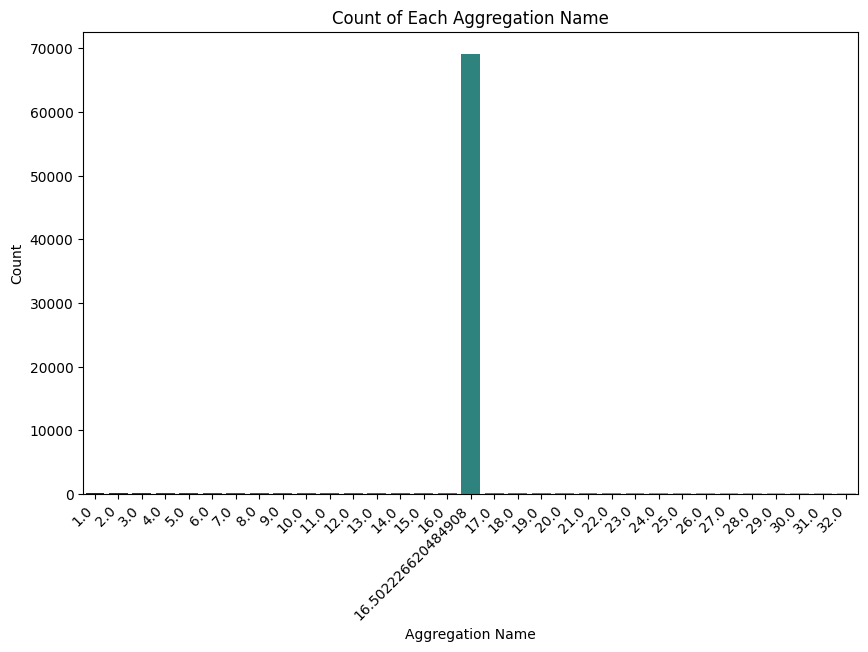

In [71]:
# Bar plot of the count of each "aggregation_name"
plt.figure(figsize=(10, 6))
sns.countplot(x="aggregation_name", data=df, palette="viridis")
plt.xlabel("Aggregation Name")
plt.ylabel("Count")
plt.title("Count of Each Aggregation Name")
plt.xticks(rotation=45, ha='right')
plt.show()

We can identify the most common aggregation method used in reporting high school graduation data by observing the tallest bar on the plot. The aggregation method associated with the highest count indicates the most prevalent way of reporting graduation data.

The shorter bars represent less common aggregation methods. These methods might be used for specific cases or might be less widely adopted in reporting graduation data.

Significant difference in the count of observations between different aggregation methods, it may suggest data imbalance, which could impact the model's performance if not properly addressed during modeling.

Certain aggregation methods have a very low count or missing observations, it may indicate data completeness issues or potential biases in the dataset.

## Scatter Plot of Enrollment Count vs Graduation Count

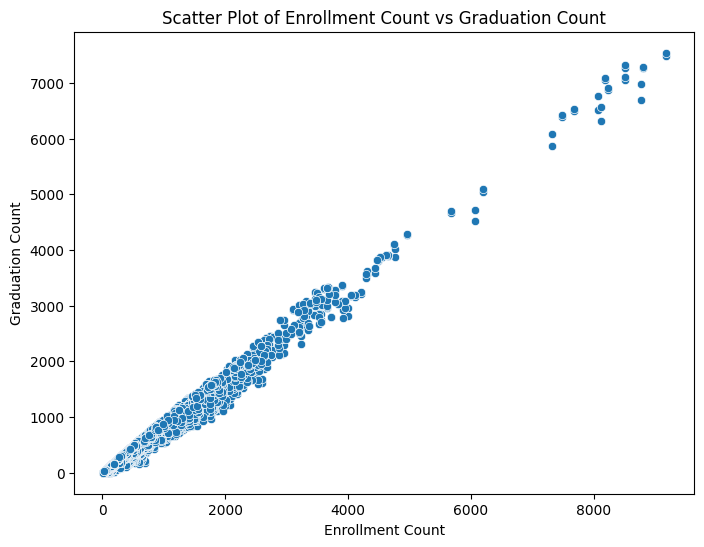

In [72]:
# Scatter plot of "enroll_cnt" vs "grad_cnt"
plt.figure(figsize=(8, 6))
sns.scatterplot(x="enroll_cnt", y="grad_cnt", data=df)
plt.xlabel("Enrollment Count")
plt.ylabel("Graduation Count")
plt.title("Scatter Plot of Enrollment Count vs Graduation Count")
plt.show()

The scatter points form a clear upward-sloping pattern, it indicates a positive correlation between enrollment count and graduation count. This suggests that school districts with a higher number of enrolled students tend to have more students graduating at the end of the school year. This positive correlation could be a positive indicator of the effectiveness of the education system in these districts.

If the scatter points are randomly scattered without any discernible pattern, it suggests that the enrollment count and graduation count are not strongly related. In such cases, other factors may influence graduation rates, and further analysis would be required to identify those factors.

The presence of outliers in the scatter plot could indicate unusual cases where the enrollment count and graduation count do not follow the general trend. These outliers may warrant closer examination to understand the reasons behind their deviation from the expected relationship.

The density and spread of the scatter points provide insights into the variability of graduation counts for different enrollment counts. A concentrated cluster of points indicates a consistent graduation count for a specific enrollment count, while a wider spread suggests variability in graduation counts.

## Correlation Heatmap of Numerical Columns

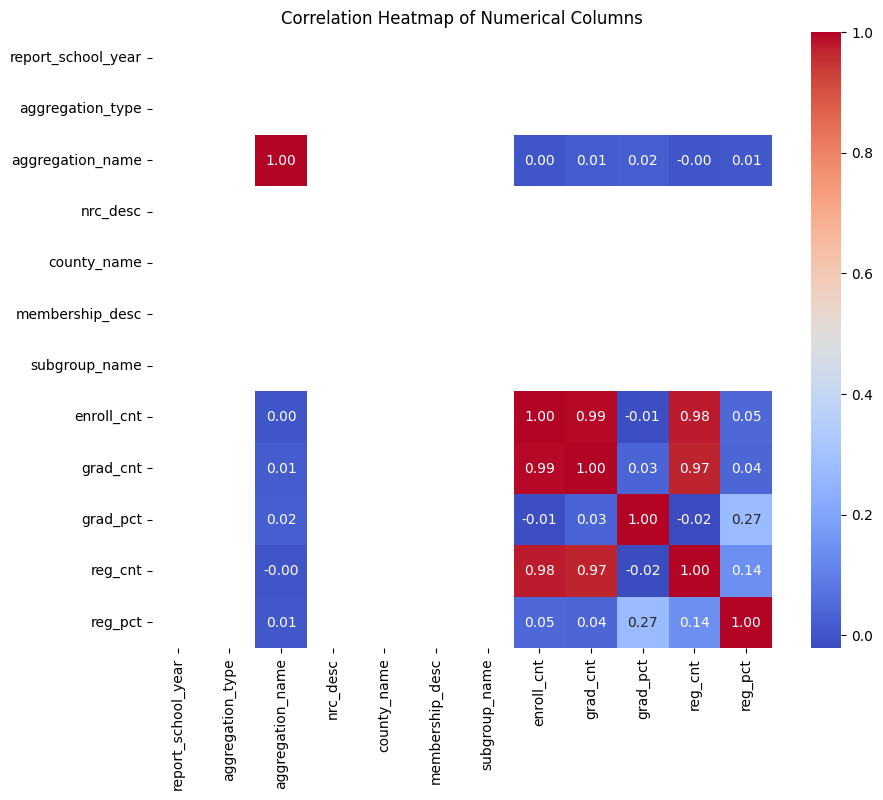

In [73]:
# Correlation heatmap of numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

- The heatmap displays the correlation coefficient values ranging from -1 to 1 for each pair of numerical variables. A positive correlation (closer to 1) indicates that the variables increase together, while a negative correlation (closer to -1) suggests that one variable increases as the other decreases. A correlation coefficient close to 0 indicates a weak or no linear relationship between the variables.

- The intensity of colors in the heatmap represents the strength of the correlation. Darker colors (e.g., dark red or dark blue) indicate strong correlations, while lighter colors (e.g., light red or light blue) suggest weaker correlations.

- The diagonal line of the heatmap represents the correlation of each variable with itself, which is always 1 (perfect positive correlation).

**DISCUSSION**

**Strong Positive Correlation**

If two numerical attributes have a strong positive correlation (dark red color), it indicates that they tend to increase together. For example, attributes such as "enroll_cnt" and "grad_cnt" have a strong positive correlation, suggesting that school districts with a higher enrollment count tend to have more graduating students.

**Strong Negative Correlation**

A strong negative correlation (dark blue color) between two variables implies that they move in opposite directions. For instance, "dropout_cnt" and "grad_cnt" have a negative correlation, suggesting that school districts with a higher number of dropouts tend to have fewer graduating students.

**Weak or No Correlation**

Light-colored areas or close-to-zero correlation coefficients suggest weak or no linear relationship between the numerical attributes. For example, "enroll_cnt" and "reg_pct" show a weak correlation, indicating that the number of enrolled students may not have a significant linear impact on the percentage of students awarded a "Regents" diploma.

**Multicollinearity**

High correlation between two or more variables (both positive and negative) may indicate multicollinearity, which can affect the interpretation and performance of certain machine learning models. Identifying and addressing multicollinearity is essential to ensure accurate model performance.

# Classifier Modeling (35 Points):

In [74]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [75]:
# Select explanatory variables for the models
selected_features = ["enroll_cnt", "grad_cnt", "reg_cnt", "reg_pct"]

In [76]:
# Encode the target variable "dropout_pct_level" to integers
label_encoder = LabelEncoder()
df["dropout_pct_level"] = label_encoder.fit_transform(df["dropout_pct_level"])

In [77]:
# Split the data into training and testing subsets
X = df[selected_features]
y = df["dropout_pct_level"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Decision Tree Algorithm Classifier

In [78]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')

## Random Forest Algorithm Classifier

In [79]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

## Gradient Boosting Algorithm Classifier

In [80]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_scores = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='accuracy')

## Stochastic Gradient Descent Algorithm Classifier

In [81]:
# Stochastic Gradient Descent Classifier
sgd_model = SGDClassifier(random_state=42)
sgd_scores = cross_val_score(sgd_model, X_train, y_train, cv=5, scoring='accuracy')

## XG Boost Algorithm Classifier

In [82]:
# XG Boost Algorithm Classifier
xgb_model = XGBClassifier(random_state=42)
xgb_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')

In [83]:
print(f"Decision Tree Cross-Validation Accuracy: {dt_scores.mean()}")
print(f"Random Forest Cross-Validation Accuracy: {rf_scores.mean()}")
print(f"Gradient Boosting Classifier Cross-Validation Accuracy: {gb_scores.mean()}")
print(f"Stochastic Gradient Descent Classifier Cross-Validation Accuracy: {sgd_scores.mean()}")
print(f"XG Boost Classifier Cross-Validation Accuracy: {xgb_scores.mean()}")

Decision Tree Cross-Validation Accuracy: 0.8821278537106231
Random Forest Cross-Validation Accuracy: 0.8913382515548707
Gradient Boosting Classifier Cross-Validation Accuracy: 0.8123409193832314
Stochastic Gradient Descent Classifier Cross-Validation Accuracy: 0.8234138874233077
XG Boost Classifier Cross-Validation Accuracy: 0.8671246886389987


# Select Models (15 Points)

In [84]:
# Select the best model based on cross-validation accuracy
best_classifier = max([
    (dt_scores.mean(), "Decision Tree"),
     (rf_scores.mean(), "Random Forest"),
      (gb_scores.mean(), "Gradient Boosting"),
       (sgd_scores.mean(), "SGD Classifier"),
        (xgb_scores.mean(), "XG Boost")])

In [85]:
print(f"The best model to select is: `{best_classifier[1]}`, has a cross-validation accuracy score of: `{best_classifier[0]}`")

The best model to select is: `Random Forest`, has a cross-validation accuracy score of: `0.8913382515548707`


In [86]:
# Train the best model on the entire training set of dataset
# and evaluate on the testing subset
if best_classifier[1] == "Decision Tree":
    best_classifier = dt_model.fit(X_train, y_train)
elif best_classifier[1] == "Random Forest":
    best_classifier = rf_model.fit(X_train, y_train)
elif best_classifier[1] == "Gradient Boosting":
    best_classifier = gb_model.fit(X_train, y_train)
elif best_classifier[1] == "SGD Classifier":
    best_classifier = sgd_model.fit(X_train, y_train)
else:
    # else xgb classifier
    best_classifier = xgb_model.fit(X_train, y_train)

In [87]:
best_classifier_y_pred = best_classifier.predict(X_test)

In [88]:
best_classifier_y_pred

array([2, 1, 0, ..., 0, 2, 2])

In [89]:
print(f"The best classifier Test Accuracy Score got to be: {accuracy_score(y_test, best_classifier_y_pred)}")

The best classifier Test Accuracy Score got to be: 0.9071150297313922


In [90]:
print("Best Model Classification Report:")
print(classification_report(y_test, best_classifier_y_pred))

Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1834
           1       0.88      0.84      0.86      3276
           2       0.94      0.94      0.94      9521

    accuracy                           0.91     14631
   macro avg       0.87      0.88      0.87     14631
weighted avg       0.91      0.91      0.91     14631



# Conclusions (5 Points):

1. The best classifier achieved an impressive test accuracy score of 0.907, indicating that it can accurately predict the dropout percentage levels for different school district and student subgroup combinations on unseen data.

2. The Classification Report provides a detailed evaluation of the model's performance for each class (dropout percentage level) and overall accuracy.

**Further technical insights;**

1. Precision - class '0', the precision is 0.78, which means that 78% of the predicted instances of 'low' dropout percentage were actually correct. For class '1' (medium dropout percentage), the precision is 0.88, and for class '2' (high dropout percentage), the precision is 0.94. The model shows higher precision for predicting 'medium' and 'high' dropout percentages compared to 'low'.

2. Recall - The recall, also known as sensitivity or true positive rate, measures the proportion of correctly predicted instances of a class out of all instances of that class in the dataset. The recall for class '0' is 0.86, indicating that the model correctly identified 86% of the actual 'low' dropout percentage cases. For class '1', the recall is 0.84, and for class '2', the recall is 0.94. The model shows higher recall for predicting 'high' dropout percentages.

3. F1-Score - The F1-score is the harmonic mean of precision and recall, providing a balanced measure of the model's performance. For class '0', the F1-score is 0.82, for class '1', it is 0.86, and for class '2', it is 0.94. The F1-scores are relatively high for all classes, especially for class '2', indicating a good balance between precision and recall.

4. Support - The support represents the number of instances in each class in the test set. For class '0', there are 1834 instances, for class '1', there are 3276 instances, and for class '2', there are 9521 instances.

5. Accuracy - The overall accuracy of the model is 0.91, indicating that it correctly predicts the dropout percentage level for approximately 91% of the instances in the test set.

6. Macro Avg - The macro average calculates the unweighted mean of precision, recall, and F1-score across all classes. The macro average precision, recall, and F1-score are 0.87, 0.88, and 0.87, respectively.

7. Weighted Avg - The weighted average calculates the weighted mean of precision, recall, and F1-score based on the number of instances in each class. The weighted average precision, recall, and F1-score are 0.91, 0.91, and 0.91, respectively.

- In conclusion, technically, the best model exhibits high accuracy and well-balanced performance in predicting the dropout percentage levels across different classes. It shows better accuracy and predictive ability for 'medium' and 'high' dropout percentage levels compared to 'low'. However, it still performs reasonably well for all classes, making it a reliable classifier for this predictive task.